In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *

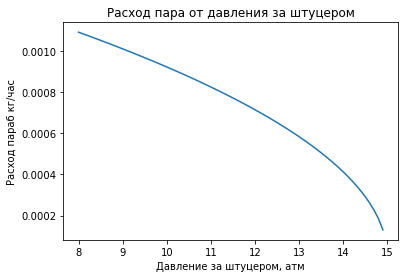

In [10]:
  # w  =  расход пара, Ibm/hr lbm(фунт)=0,453592 кг
d0_mm=5  # диаметр отверстия
d1_mm=100 # диаметр трубы
C0 =0.9 # коэффициент разряда штуцера
Fa=0.0000072 # коэффициент теплового расширения отверстия
Y2=0.966 # коэффициент расширения пара
p1_atm=15 # давление перед отверстием
p2_atm=10 # давление за отверстием
vfg_m3kg=57.8 # удельный объем пара
vf_m3kg=0.001# удельный объем жидкости
A=0.99998
B=1.38
a=37.037
b=0.345
X=100 #сухость пара
p2_atm_a = np.arange(8,15,0.1)
def w_kghr(d0_mm, p2_atm):
    d0_in=d0_mm/25.4 #дюймы
    d1_in=d1_mm/25.4
    beta=d0_in/d1_in
    f_atm=p1_atm-p2_atm  # падение давления в отверстии
    f_psi=f_atm*14.2233
    vfg=vfg_m3kg/16.01845
    vf=vf_m3kg/16.01845
    vexp_ft3lbm=A*vfg*(X/100)**B+vf #двухфазный уд. объем пара при прохождении через штуцер
    w_lbmhr=1888.56*C0*Fa*Y2*(d0_in**2)*((f_psi/vexp_ft3lbm)**0.5)/((1-beta**4)**0.5)
    w_kghr=w_lbmhr*0.453592 # 23000 сам написал
    return w_kghr
q=np.array([])
for pd in p2_atm_a:
    p1=w_kghr(d0_mm, pd)
    q=np.append(q,p1)
plt.plot(p2_atm_a,q)
plt.title('Расход пара от давления за штуцером')
plt.xlabel('Давление за штуцером, атм')
plt.ylabel('Расход параб кг/час')
plt.show()   

### Fa стр 854
![image.png](attachment:image.png)

# Orifice discharge coefficient страница 754
![image.png](attachment:image.png)

Коэф теплового расширени я для пара
![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [18]:
k=1.3
d0_mm=5  # диаметр отверстия
d1_mm=100 # диаметр трубы
p1_atm=15 # давление перед отверстием
p2_atm=10 # давление за отверстием
p1_psi=p1_atm*14.2233
p2_psi=p2_atm*14.2233
d0_in=d0_mm/25.4 #дюймы
d1_in=d1_mm/25.4
Y1=((1-(d0_in/d1_in)**4)*k/(k-1)*(p2_psi/p1_psi)**(2/k)*(1-(p2_psi/p1_psi)**((k-1)/k))/(1-(d0_in/d1_in)**4*(p2_psi/p1_psi)**(2/k))/(1-p2_psi/p1_psi))**0.5
Y2=Y1*(p1_psi/p2_psi)**0.5
print(Y1)
print(Y2)

0.7888637947324477
0.9661568868250725


In [20]:
beta=d0_in/d1_in
x1=(p1_psi-p2_psi)/p1_psi
x2=(p1_psi-p2_psi)/p2_psi
Y2=(1+x2)**0.5-(0.41-0.35*beta**4)*x2/k/(1+x2)**0.5
Y1=1-(0.41-0.35*beta**4)*x1/k
print(Y1)
print(Y2)

0.8948723557692307
1.0959903282784746


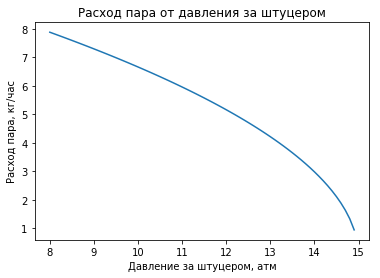

In [17]:
d0_mm=5  # диаметр отверстия
d1_mm=100 # диаметр трубы
C0 =0.8 # коэффициент разряда штуцера
Y1=0.89487 # коэффициент расширения пара
p1_atm=15 # давление перед отверстием
p2_atm=10 # давление за отверстием
vfg_m3kg=57.8 # удельный объем пара
ro_kgm3=1/vfg_m3kg
vf_m3kg=0.001# удельный объем жидкости
a=37.037
b=0.345
X=100 #сухость пара
p2_atm_a = np.arange(8,15,0.1)
def w_kghr(d0_mm, p2_atm):
    beta=d0_mm/d1_mm
    f_atm=p1_atm-p2_atm  # падение давления в отверстии
    f_kPa=f_atm*100
#    vfg=vfg_m3kg/16.01845
#    vf=vf_m3kg/16.01845
#    vexp_ft3lbm=A*vfg*(X/100)**B+vf #двухфазный уд. объем пара при прохождении через штуцер
#    ro_kgm3=1/vexp_ft3lbm/16.018
    w_kgsec=3.512407*10**(-5)*C0*Y1*d0_mm**2*(f_kPa*ro_kgm3)**0.5/(1-beta**4)**0.5
    w_kghr=w_kgsec*3600
    return w_kghr
q=np.array([])
for pd in p2_atm_a:
    p1=w_kghr(d0_mm, pd)
    q=np.append(q,p1)
plt.plot(p2_atm_a,q)
plt.title('Расход пара от давления за штуцером')
plt.xlabel('Давление за штуцером, атм')
plt.ylabel('Расход пара, кг/час')
plt.show()   